In [1]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [2]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
INCLUDE_MURDER = True

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

if INCLUDE_MURDER:
    fname = 'data_cleaned_Illicit_Days0_grouped_with_murder.csv'
else:
    fname = 'data_cleaned_Illicit_Days0_grouped.csv'

df = pd.read_csv(fname)
df.head()

,Unnamed: 0,female,nonwhite,unemplmt,prsatx,adol,Illicit_Days0,Illicit_Cens0,checkin_flag,gvsg_-8,gvsg_-4,gvsg_0,gvsg_1,gvsg_2,CWSg_0_-8,CWSg_0_-4,CWSg_0_0,CWSg_0_1,CWSg_0_2,srprobg_0.0,srprobg_1.0,srprobg_2.0,dssg_0_-8,dssg_0_-4,dssg_0_0,dssg_0_1,dssg_0_2,epsg_0_-8,epsg_0_-4,epsg_0_0,epsg_0_1,epsg_0_2,adhdg_0_-8,adhdg_0_-4,adhdg_0_0,adhdg_0_1,adhdg_0_2,cdsg_0_-8,cdsg_0_-4,cdsg_0_0,cdsg_0_1,cdsg_0_2,cjsig_0_-8,cjsig_0_-7,cjsig_0_-4,cjsig_0_0,cjsig_0_1,cjsig_0_2,lrig_0_-8,lrig_0_-7,lrig_0_-4,lrig_0_0,lrig_0_1,lrig_0_2,srig_0_-8,srig_0_-7,srig_0_-4,srig_0_0,srig_0_1,srig_0_2,pssig_0_-8,pssig_0_-7,pssig_0_-4,pssig_0_-3,pssig_0_0,pssig_0_1,pssig_0_2,rerig_0_-8,rerig_0_-7,rerig_0_-4,rerig_0_-3,rerig_0_0,rerig_0_1,rerig_0_2,racegrps_-8,racegrps_-4,racegrps_1,racegrps_2,racegrps_3,racegrps_4,racegrps_5,racegrps_6,racegrps_7,POPIgrp_-8,POPIgrp_-7,POPIgrp_-4,POPIgrp_-3,POPIgrp_1,POPIgrp_2,POPIgrp_3,POPIgrp_4,POPIgrp_5,afssg_0_-8,afssg_0_-4,afssg_0_0,afssg_0_1,afssg_0_2,tpsg_0_-8,tpsg_0_-4,tpsg_0_-3,tpsg_0_0,tpsg_0_1,tpsg_0_2,gssig_0_-8,gssig_0_-4,gssig_0_-3,gssig_0_0,gssig_0_1,gssig_0_2,PMSg_-8,PMSg_-7,PMSg_-4,PMSg_-3,PMSg_0,PMSg_1,PMSg_2,IMSg_-8,IMSg_-7,IMSg_-4,IMSg_-3,IMSg_0,IMSg_1,IMSg_2,SESg_0_-8,SESg_0_-7,SESg_0_-4,SESg_0_0,SESg_0_1,SESg_0_2,r4ag_0_0.0,r4ag_0_1.0,r4ag_0_2.0,primsev_1.0,primsev_3.0,primsev_4.0,primsev_5.0,primsev_6.0,murder_num_grouped_0.0,murder_num_grouped_1.0,murder_num_grouped_2.0
0,2387,1,1.0,1.0,1.0,0,96,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,4287,1,1.0,1.0,0.0,0,240,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,5217,1,1.0,0.0,0.0,0,365,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,5781,1,1.0,1.0,0.0,0,351,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,5980,1,1.0,1.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [5]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(14850, 139)

Adolescent Survival Analysis

In [6]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days0'
censoring_var = 'Illicit_Cens0'

adolescent_data = df[df.adol == 1]
adolescent_label = adolescent_data[[censoring_var, predictor_var]]
adolescent_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(adolescent_data, adolescent_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(9552, 137) (9552,)
(2389, 137) (2389,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: sklearn.tree._splitter.Splitter size changed, may indicate binary incompatibility. Expected 360 from C header, got 368 from PyObject
  return f(*args, **kwds)


CPU times: user 2min 49s, sys: 739 ms, total: 2min 49s
Wall time: 3min 14s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [8]:
%%time
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 6.91 s, sys: 1.04 s, total: 7.95 s
Wall time: 8.37 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [9]:
%%time
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 3.1 s, sys: 195 ms, total: 3.29 s
Wall time: 2.6 s


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [10]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Adol': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
adol_concordance = pd.DataFrame(data=scores)

In [11]:
# display feature importance for gbsa
adol_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Adol':gbsa.feature_importances_,})
adol_feature_importance.sort_values(by=['Adol'], ascending=False, inplace=True)
display_side_by_side(adol_feature_importance, 4)

,Feature,Adol
75,racegrps_3,0.249593
18,srprobg_2.0,0.179680
16,srprobg_0.0,0.142725
126,r4ag_0_0.0,0.063043
135,murder_num_grouped_1.0,0.058735
132,primsev_5.0,0.033710
26,epsg_0_0,0.030466
42,cjsig_0_0,0.028453
67,rerig_0_-3,0.017228
96,tpsg_0_-3,0.017001


In [12]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

In [13]:
import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens0 == 0]
    counts = relapsed['Illicit_Days0'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

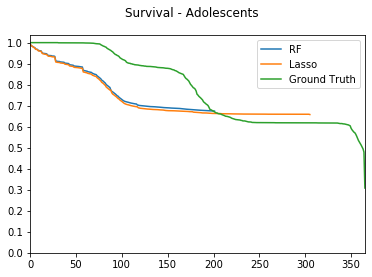

In [14]:
# display survival plot
plt.suptitle('Survival - Adolescents')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_adol_grouped_with_murder.png'
else:
    fname = 'survival_adol_grouped.png'
plt.savefig(fname)
plt.show()

In [15]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

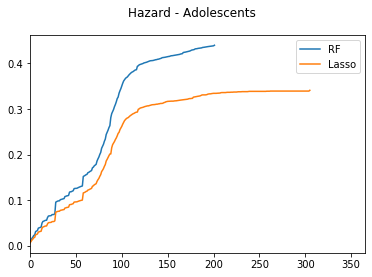

In [16]:
# display hazard plot
plt.suptitle('Hazard - Adolescents')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Young Adult Survival Analysis

In [17]:
young_adult_features = df[df.adol == 0]
young_adult_labels = young_adult_features[[censoring_var, predictor_var]]
young_adult_features.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(young_adult_features, young_adult_labels, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(2327, 137) (2327,)
(582, 137) (582,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 9.07 s, sys: 93.6 ms, total: 9.16 s
Wall time: 9.76 s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [19]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 1.34 s, sys: 197 ms, total: 1.54 s
Wall time: 1.6 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [20]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 873 ms, sys: 55.2 ms, total: 928 ms
Wall time: 610 ms


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [21]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
          'Young Adults': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                           rcr.score(X_test, y_test_censored)]}
non_adol_concordance = pd.DataFrame(data=scores)

In [22]:
# display feature importance for gbsa

non_adol_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Non Adol':gbsa.feature_importances_,})
non_adol_feature_importance.sort_values(by=['Non Adol'], ascending=False, inplace=True)
display_side_by_side(non_adol_feature_importance, 4)

,Feature,Non Adol
132,primsev_5.0,0.179806
77,racegrps_5,0.097703
67,rerig_0_-3,0.074385
76,racegrps_4,0.047043
123,SESg_0_0,0.043897
1,nonwhite,0.037663
62,pssig_0_1,0.037091
61,pssig_0_0,0.035974
87,POPIgrp_4,0.035536
135,murder_num_grouped_1.0,0.029441


In [23]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

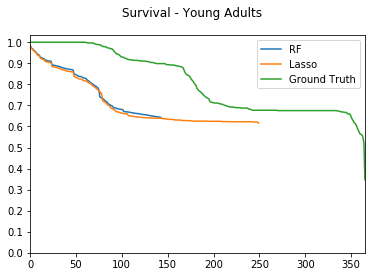

In [24]:
# display survival plot
plt.suptitle('Survival - Young Adults')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_young_adult_grouped_with_murder.png'
else:
    fname = 'survival_young_adult_grouped.png'
plt.savefig(fname)
plt.show()

In [25]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

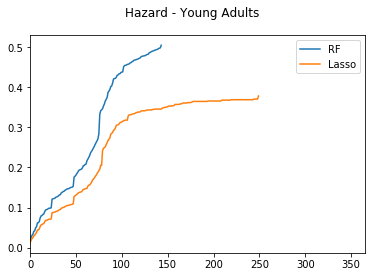

In [26]:
# display hazard plot
plt.suptitle('Hazard - Young Adults')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Overall Statistics

In [27]:
overall_scores = pd.concat([adol_concordance, non_adol_concordance['Young Adults']], axis=1)
pd.DataFrame(data=overall_scores)

,Model,Adol,Young Adults
0,Random Forest Boosted,0.682895,0.683462
1,Random Forest,0.711294,0.696936
2,Lasso,0.677237,0.662695


In [28]:
temp = pd.concat([adol_feature_importance, non_adol_feature_importance['Non Adol']], axis=1)
overall_feature_importance = pd.DataFrame(data=temp)

In [29]:
overall_feature_importance['Total'] = overall_feature_importance[['Adol', 'Non Adol']].sum(axis=1)
temp = overall_feature_importance.nlargest(10,['Total'])
display_side_by_side(temp, 1)

,Feature,Adol,Non Adol,Total
75,racegrps_3,0.249593,0.017329,0.266922
132,primsev_5.0,0.033710,0.179806,0.213516
18,srprobg_2.0,0.179680,0.003610,0.183290
16,srprobg_0.0,0.142725,0.000000,0.142725
77,racegrps_5,0.000000,0.097703,0.097703
67,rerig_0_-3,0.017228,0.074385,0.091613
135,murder_num_grouped_1.0,0.058735,0.029441,0.088176
126,r4ag_0_0.0,0.063043,0.009583,0.072626
76,racegrps_4,0.007642,0.047043,0.054684
123,SESg_0_0,0.003591,0.043897,0.047488


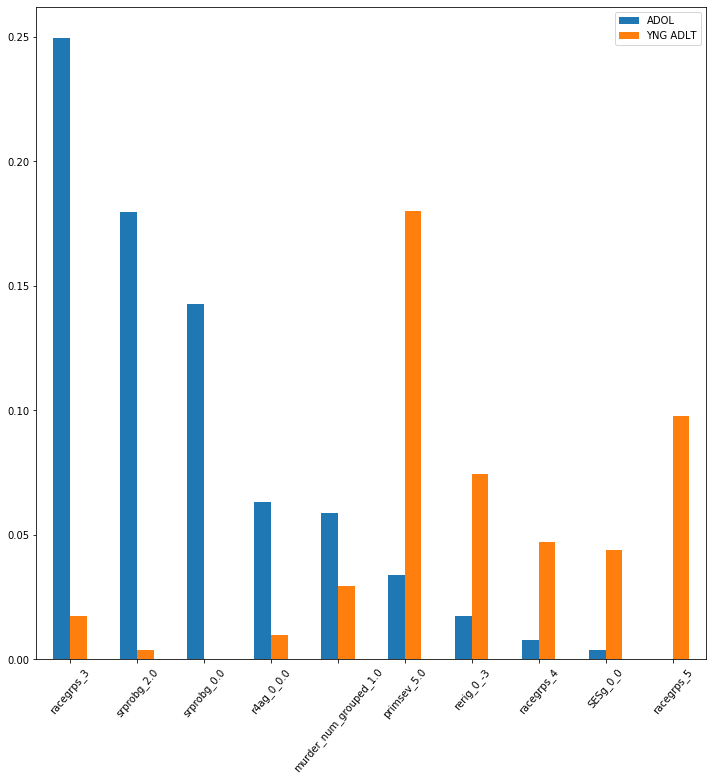

In [30]:
df = pd.DataFrame({'ADOL': temp['Adol'].tolist(),
                   'YNG ADLT': temp['Non Adol'].tolist()},
                  index=temp['Feature'].tolist())
df.sort_values(by=['ADOL'], ascending=False, inplace=True)
ax = df.plot.bar(rot=50, figsize=(12, 12))
fig = ax.get_figure()
if INCLUDE_MURDER:
    fname = 'feature_importances_age_grouped_with_murder.png'
else:
    fname = 'feature_importances_age_grouped.png'
fig.savefig(fname)

In [31]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 3 minutes 46 seconds ---
